In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import CMAPSSLoader
from preprocessor import CMAPSSPreprocessor

In [2]:
loader = CMAPSSLoader()
preprocessor = CMAPSSPreprocessor(save_dir='../data/processed')
df = loader.load_dataset('FD001')
df, dropped = preprocessor.preprocess(df, 'FD001')

Loaded FD001: 20631 records, 100 engines
processed data saved to ../data/processed/FD001_processed.csv


In [3]:
print(f"Shape: {df.shape}")
print(f"Engines: {df['engine_id'].nunique()}")
df.head()

Shape: (20631, 19)
Engines: 100


engine_id  time_cycles  operational_setting_1  operational_setting_2  \
0          1            1                -0.0007                -0.0004   
1          1            2                 0.0019                -0.0003   
2          1            3                -0.0043                 0.0003   
3          1            4                 0.0007                 0.0000   
4          1            5                -0.0019                -0.0002   

   operational_setting_3  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  \
0                  100.0    641.82   1589.70   1400.60    554.36   2388.06   
1                  100.0    642.15   1591.82   1403.14    553.75   2388.04   
2                  100.0    642.35   1587.99   1404.20    554.26   2388.08   
3                  100.0    642.35   1582.79   1401.87    554.45   2388.11   
4                  100.0    642.37   1582.85   1406.22    554.00   2388.06   

   sensor_9  sensor_11  sensor_12  sensor_13  sensor_15  sensor_17  sensor_20  \
0   9046.19      47.47     521.66    2388.02     8.4195        392      39.06   
1   9044.07      47.49     522.28    2388.07     8.4318        392      39.00   
2   9052.94      47.27     522.42    2388.03     8.4178        390      38.95   
3   9049.48      47.13     522.86    2388.08     8.3682        392      38.88   
4   9055.15      47.28     522.19    2388.04     8.4294        393      38.90   

   sensor_21  RUL  
0    23.4190  191  
1    23.4236  190  
2    23.3442  189  
3    23.3739  188  
4    23.4044  187

In [4]:
print(dropped)

{'constant': ['sensor_1', 'sensor_10', 'sensor_18', 'sensor_19'], 'low_variance': ['sensor_5', 'sensor_6', 'sensor_16'], 'correlated': ['sensor_14']}


# Basic Statistics

In [5]:
print("Missing values: \n", df.isna().sum())

Missing values: 
 engine_id                0
time_cycles              0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_15                0
sensor_17                0
sensor_20                0
sensor_21                0
RUL                      0
dtype: int64


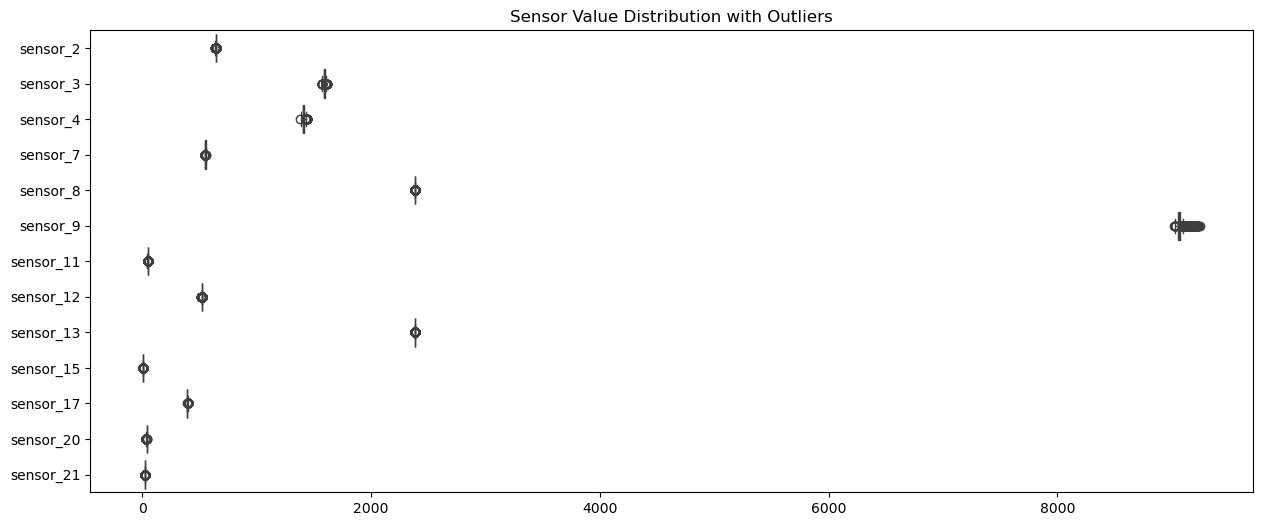

In [6]:
sensors = [c for c in df.columns if 'sensor' in c]

plt.figure(figsize=(15,6))
sns.boxplot(data=df[sensors], orient='h')
plt.title("Sensor Value Distribution with Outliers")
plt.show()

             count         mean        std        min        25%        50%  \
sensor_2   20631.0   642.680934   0.500053   641.2100   642.3250   642.6400   
sensor_3   20631.0  1590.523119   6.131150  1571.0400  1586.2600  1590.1000   
sensor_4   20631.0  1408.933782   9.000605  1382.2500  1402.3600  1408.0400   
sensor_7   20631.0   553.367711   0.885092   549.8500   552.8100   553.4400   
sensor_8   20631.0  2388.096652   0.070985  2387.9000  2388.0500  2388.0900   
sensor_9   20631.0  9065.242941  22.082880  9021.7300  9053.1000  9060.6600   
sensor_11  20631.0    47.541168   0.267087    46.8500    47.3500    47.5100   
sensor_12  20631.0   521.413470   0.737553   518.6900   520.9600   521.4800   
sensor_13  20631.0  2388.096152   0.071919  2387.8800  2388.0400  2388.0900   
sensor_15  20631.0     8.442146   0.037505     8.3249     8.4149     8.4389   
sensor_17  20631.0   393.210654   1.548763   388.0000   392.0000   393.0000   
sensor_20  20631.0    38.816271   0.180746    38.140

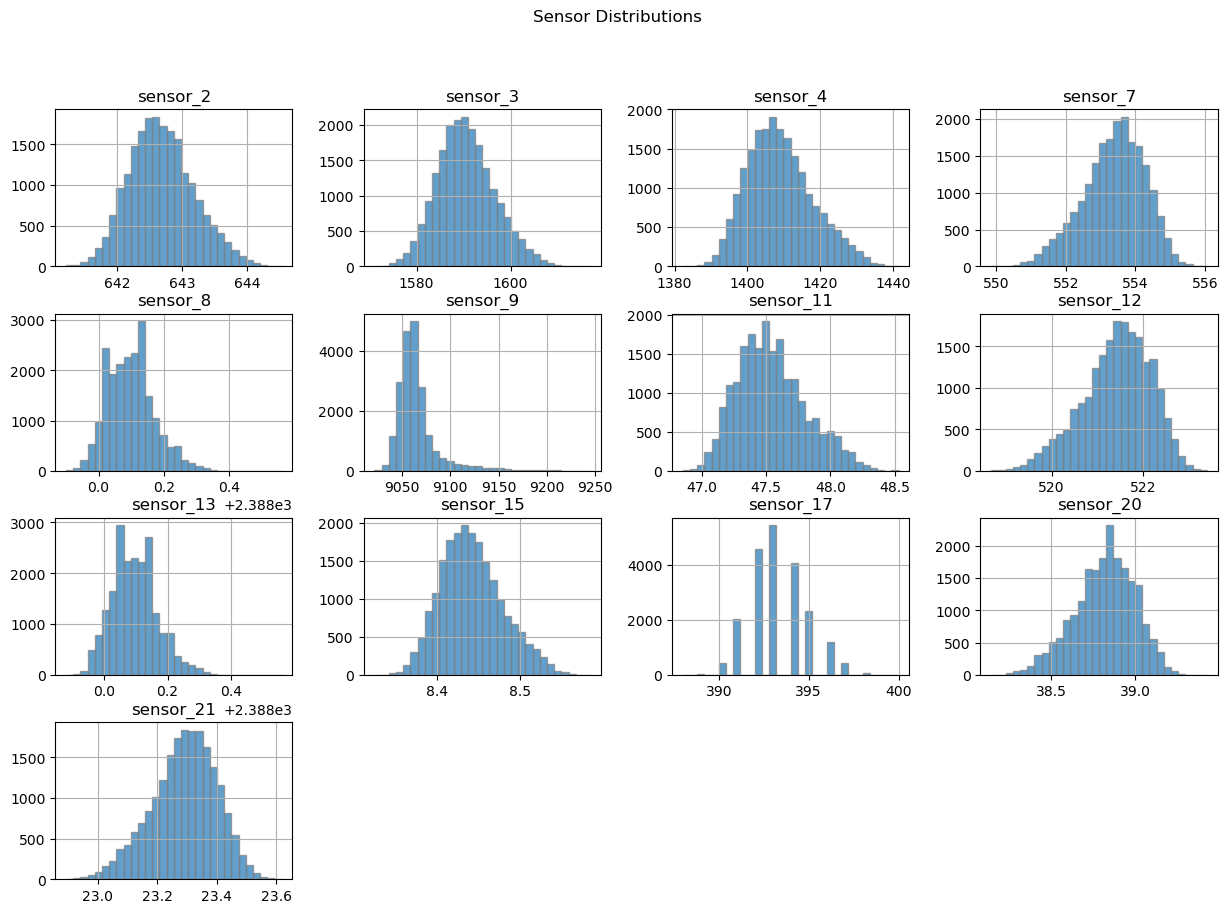

In [7]:
desc_stats = df[sensors].describe().T
desc_stats['skew'] = df[sensors].skew()
print(desc_stats)

df[sensors].hist(figsize=(15,10), bins=30, alpha=0.7, edgecolor='grey')
plt.suptitle("Sensor Distributions")
plt.show()


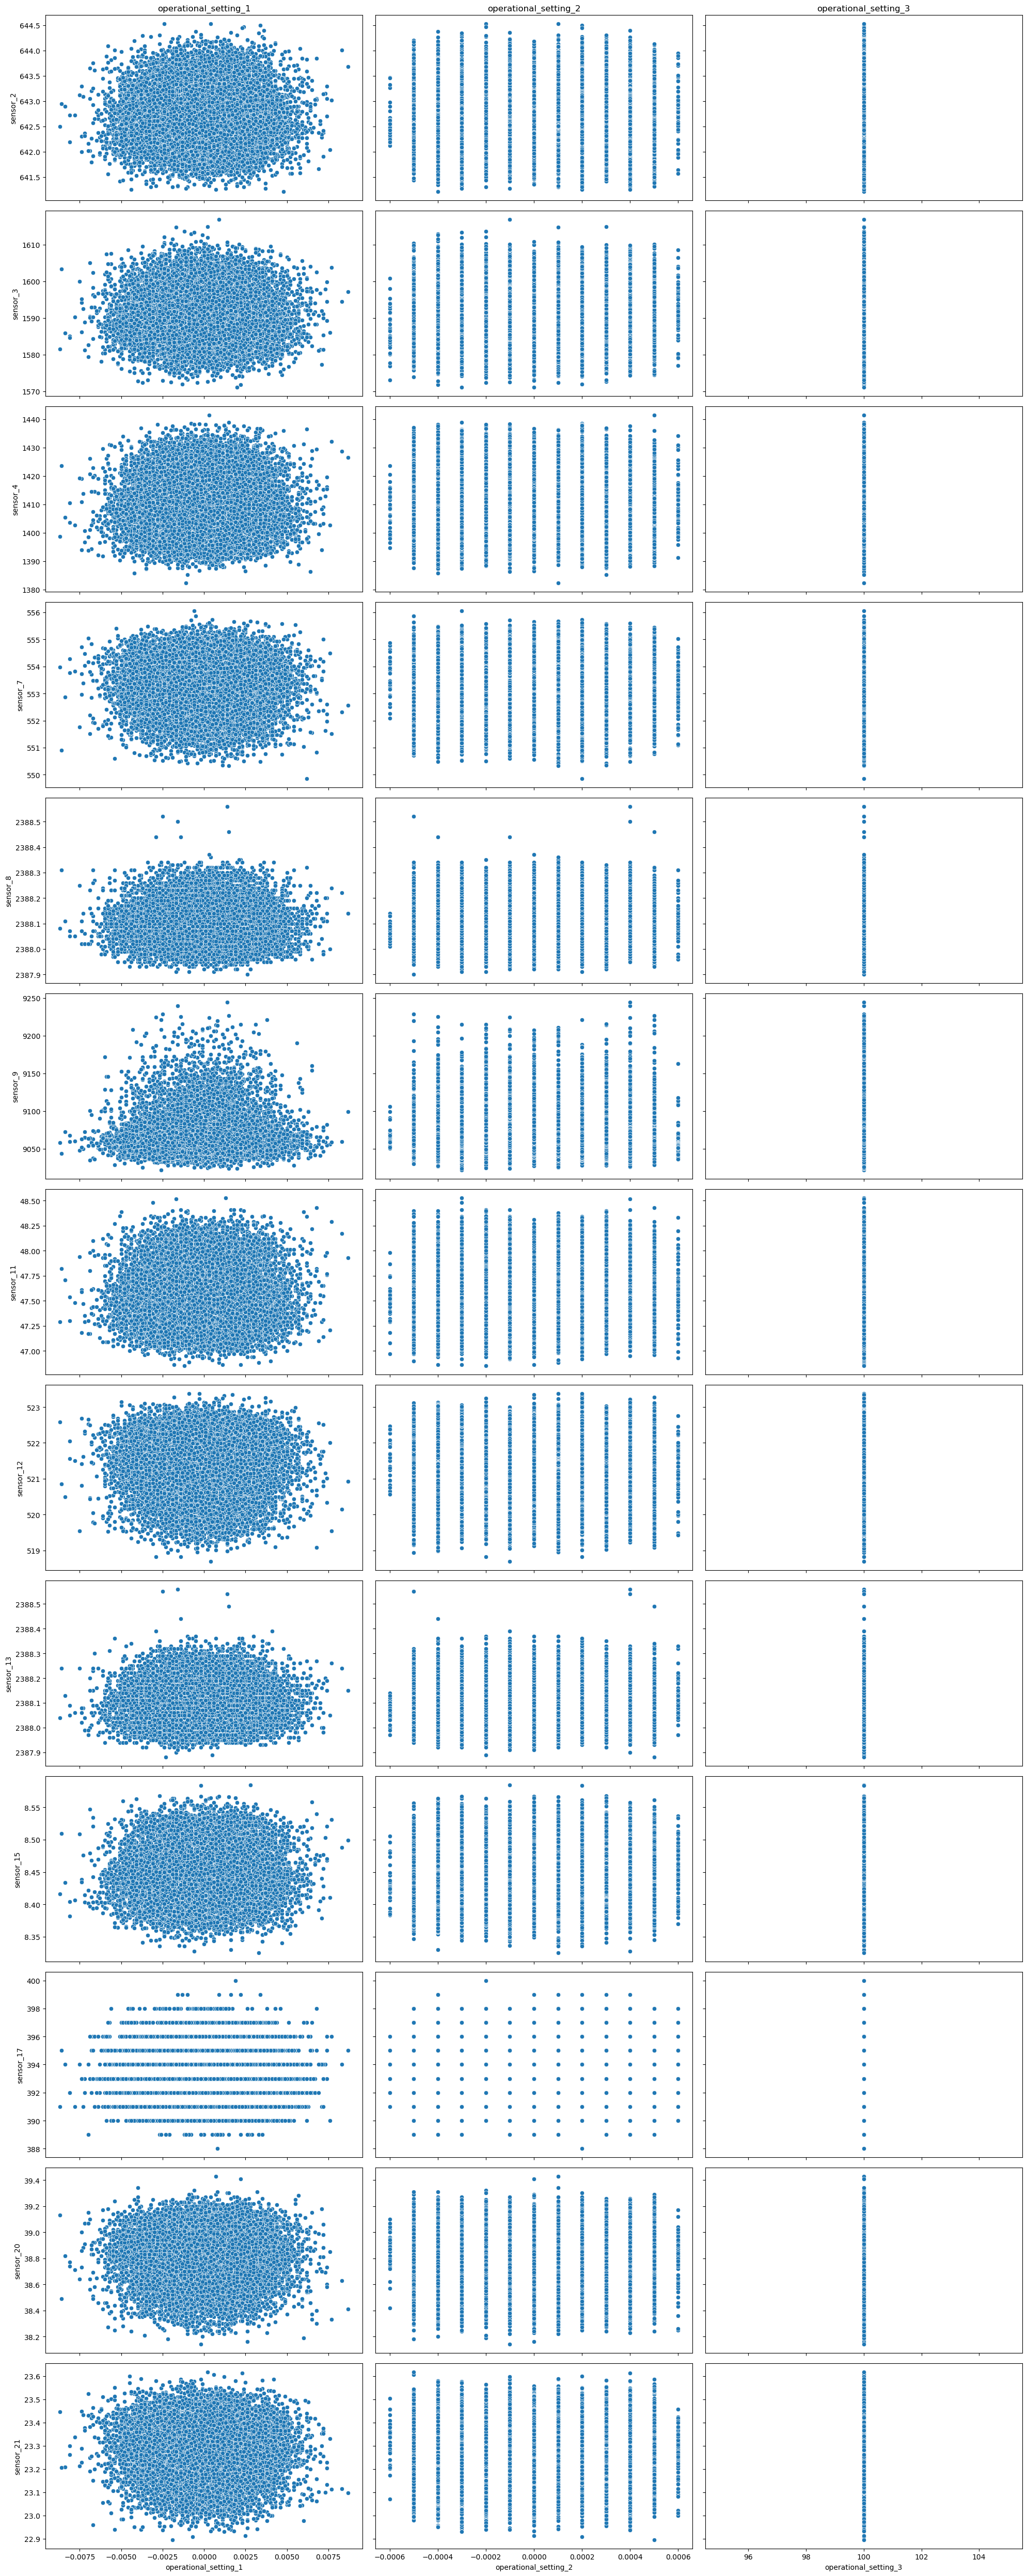

In [8]:
ops = [c for c in df.columns if 'setting' in c]

fig, axes = plt.subplots(len(sensors), len(ops), figsize=(20, 50), sharex='col', sharey='row')

for i, sensor in enumerate(sensors):
    for j, op in enumerate(ops):
        ax = axes[i, j]
        sns.scatterplot(x=df[op], y=df[sensor], ax=ax)
        if i == 0:
            ax.set_title(op)
        if j == 0:
            ax.set_ylabel(sensor)

plt.tight_layout()
plt.show()


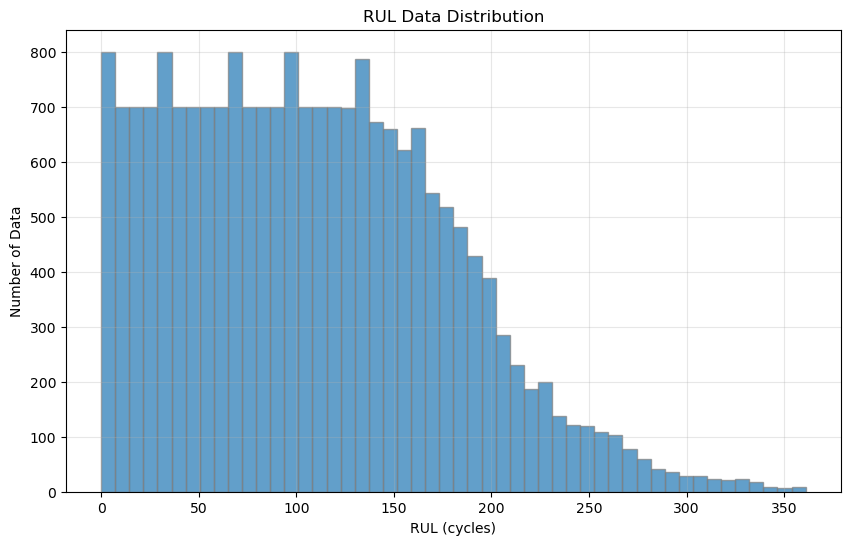

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['RUL'], bins=50, alpha=0.7, edgecolor='grey')
plt.title('RUL Data Distribution')
plt.xlabel('RUL (cycles)')
plt.ylabel('Number of Data')
plt.grid(True, alpha=0.3)
plt.show()

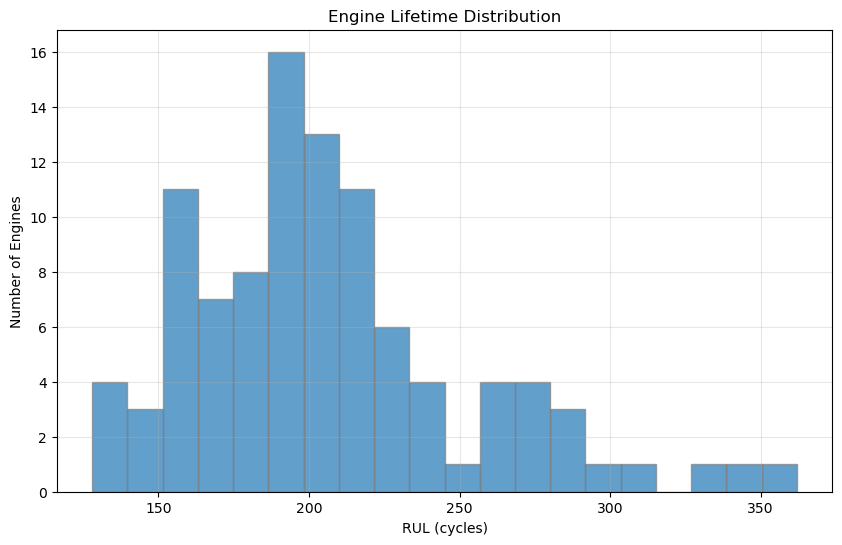

In [10]:
engine_lifetimes = df.groupby('engine_id')['time_cycles'].max()

plt.figure(figsize=(10, 6))
plt.hist(engine_lifetimes, bins=20, alpha=0.7, edgecolor='grey')
plt.title('Engine Lifetime Distribution')
plt.xlabel('RUL (cycles)')
plt.ylabel('Number of Engines')
plt.grid(True, alpha=0.3)
plt.show()

## Correlation Heatmap of Sensors

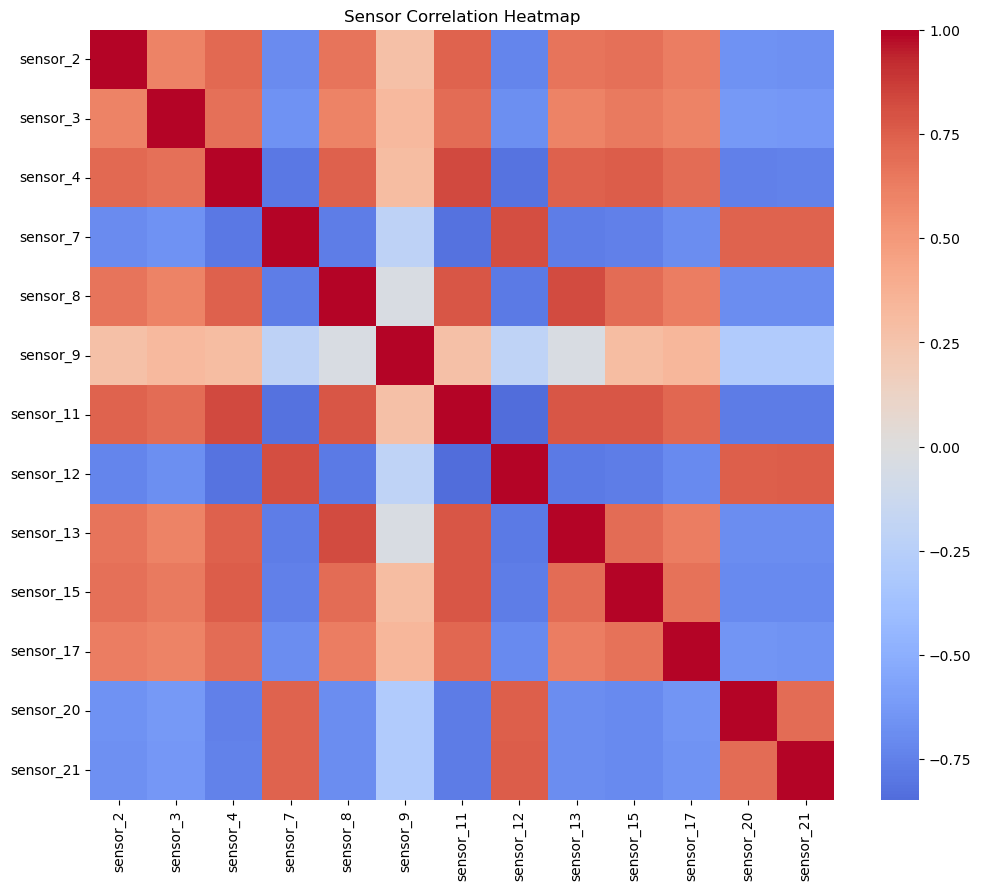

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df[[c for c in df.columns if 'sensor' in c]].corr(), cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

## Engine Sensor Time-Series

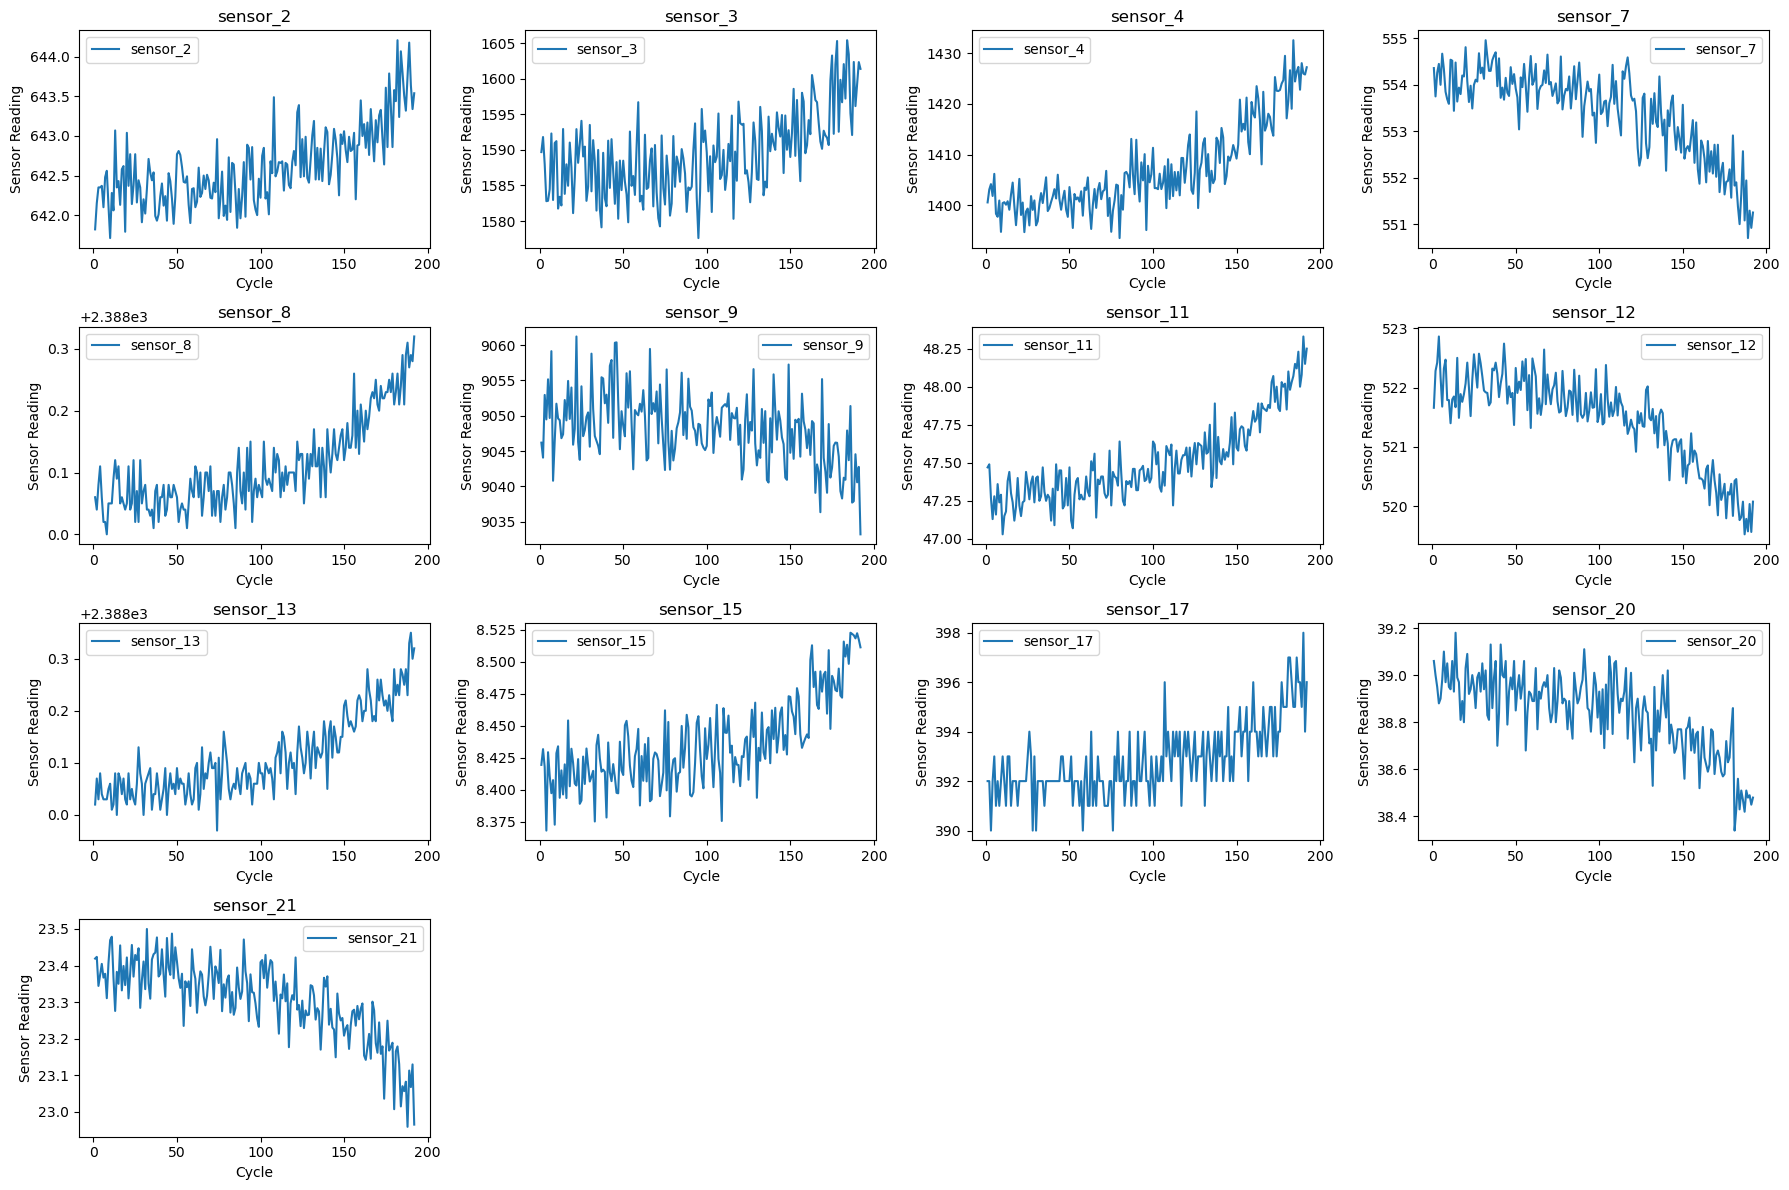

In [12]:
engine = 1
subset = df[df.engine_id == engine]

sensors = [c for c in df.columns if 'sensor' in c]

n_cols = 4
n_rows = int(len(sensors) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, sensor in enumerate(sensors):
    axes[i].plot(subset['time_cycles'], subset[sensor], label=sensor, color='tab:blue')
    axes[i].set_title(f"{sensor}")
    axes[i].set_xlabel("Cycle")
    axes[i].set_ylabel("Sensor Reading")
    axes[i].legend()

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Operational Settings Distribution

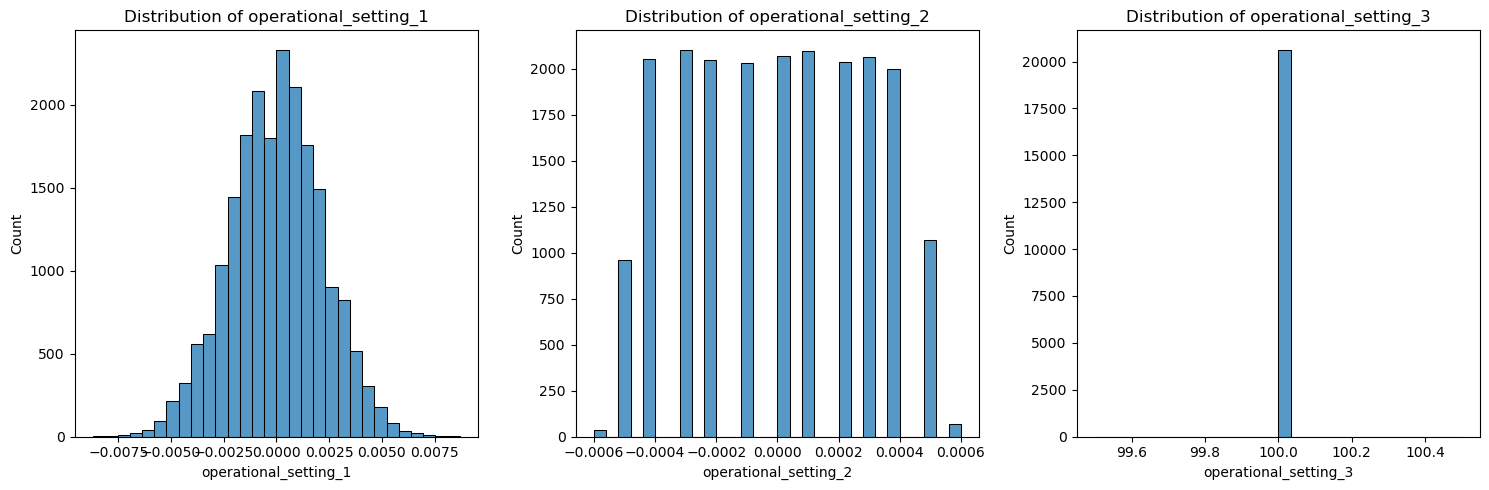

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate([f'operational_setting_{j}' for j in range(1,4)]):
    sns.histplot(df[col], bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Sensor Vs. RUL Scatter

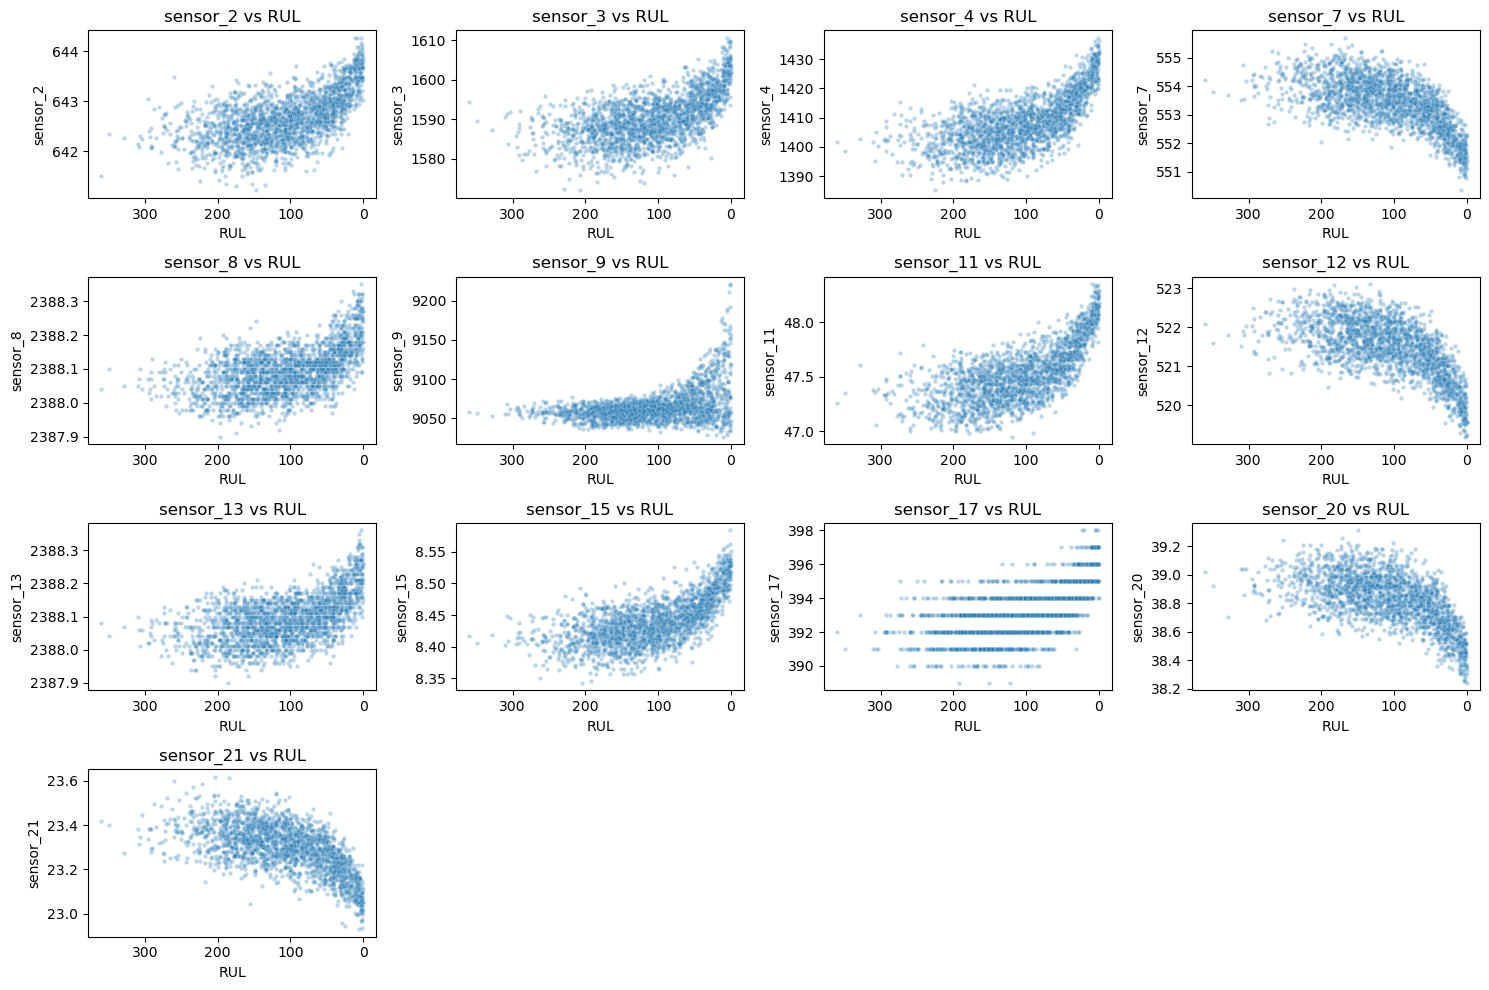

In [14]:
sensors = [c for c in df.columns if 'sensor' in c]

n_cols = 4
n_rows = int(len(sensors) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, sensor in enumerate(sensors):
    sns.scatterplot(
        x=df['RUL'].sample(2000, random_state=42),
        y=df[sensor].sample(2000, random_state=42),
        s=10, alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f"{sensor} vs RUL")
    axes[i].invert_xaxis()

# remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Normalized Lifecycle Plots

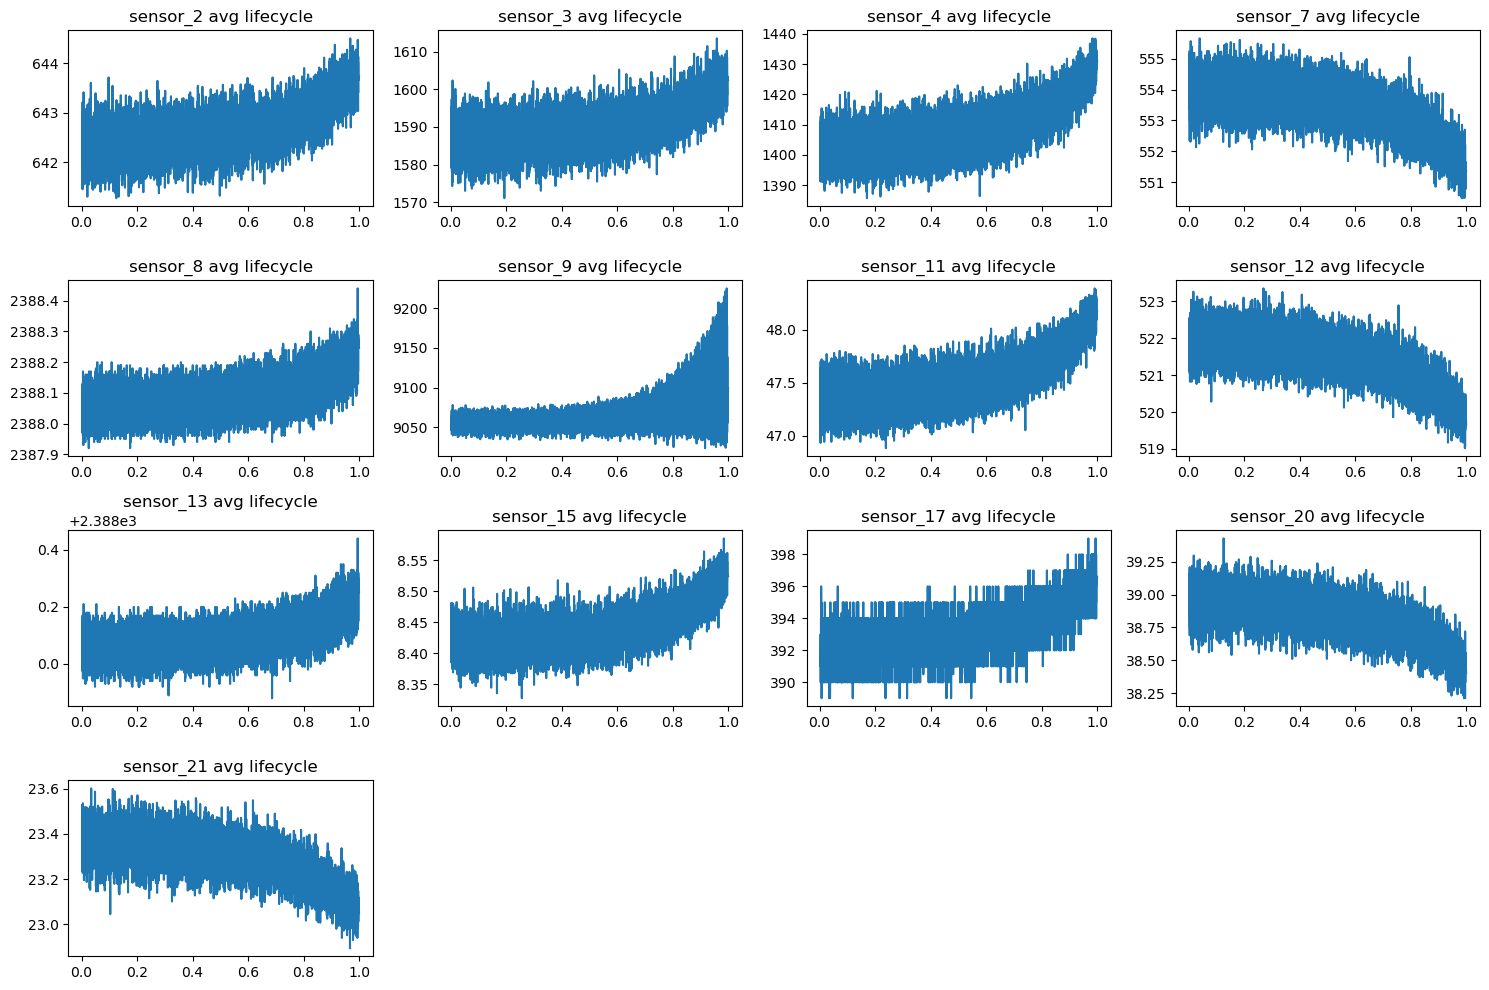

In [15]:
import matplotlib.pyplot as plt

sensors = [c for c in df.columns if 'sensor' in c]

normed = df.copy()
normed['cycle_norm'] = normed.groupby('engine_id')['time_cycles'].transform(
    lambda x: x / x.max()
)

n_cols = 4
n_rows = int(len(sensors) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, sensor in enumerate(sensors):
    avg_trend = normed.groupby('cycle_norm')[sensor].mean()
    axes[i].plot(avg_trend.index, avg_trend.values)
    axes[i].set_title(f"{sensor} avg lifecycle")

# remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
